In [3]:
# テーマ:手書き数字のデータセットを使用し、ディープラーニングにより画像データの分類を行う（段階的に改善していく）

import warnings
warnings.filterwarnings('ignore')

In [3]:
! pip install tensorflow

     |████████████████████████████████| 195.7 MB 159 kB/s  eta 0:00:01  |▏                               | 1.1 MB 6.1 MB/s eta 0:00:32     |███▏                            | 19.7 MB 14.5 MB/s eta 0:00:13     |████▌                           | 27.4 MB 14.5 MB/s eta 0:00:12     |████████                        | 48.6 MB 8.9 MB/s eta 0:00:17     |██████████                      | 61.8 MB 8.9 MB/s eta 0:00:16     |████████████▎                   | 75.2 MB 17.5 MB/s eta 0:00:07     |████████████▊                   | 77.6 MB 17.5 MB/s eta 0:00:07     |████████████████▌               | 100.6 MB 13.9 MB/s eta 0:00:07     |██████████████████▉             | 115.3 MB 13.9 MB/s eta 0:00:06     |████████████████████▍           | 124.5 MB 27.3 MB/s eta 0:00:03     |██████████████████████▌         | 137.3 MB 27.3 MB/s eta 0:00:03     |██████████████████████▊         | 138.6 MB 27.3 MB/s eta 0:00:03     |████████████████████████████▌   | 174.4 MB 17.5 MB/s eta 0:00:02     |████████████████████████████

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.options.display.max_columns = None

In [71]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [72]:
digits = load_mnist(flatten=True)

In [73]:
# 前処理

(X_train, Y_train), (X_test, Y_test) = digits

In [74]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# 各サンプルは、(一次元に変換しているが、)(28, 28)の形状であることが分かる

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [75]:
# カテゴリー変数への展開
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [76]:
# 再び形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [77]:
# まずは、全結合層のみで構成したモデルで分類を行ってみる

# 説明変数の例
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [78]:
# データの分割
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [79]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (42000, 10) , X_train= (42000, 784)
Y_valid= (18000, 10) , X_valid= (18000, 784)
Y_test= (10000, 10) , X_test= (10000, 784)


In [80]:
model = keras.Sequential()

# 入力層
model.add(Dense(128, activation='relu', input_shape=(784,)))
# 中間層
model.add(Dense(64, activation='relu', input_shape=(128,)))
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(16, activation='relu', input_shape=(32,)))
# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
# モデルの構造を表示
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


In [85]:
%%time

# 学習の実施
log = model.fit(X_train, Y_train, epochs=1000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/1000
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0148 - accuracy: 0.9965 - val_loss: 0.2828 - val_accuracy: 0.9736
Epoch 2/1000
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.2925 - val_accuracy: 0.9728
Epoch 3/1000
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.3015 - val_accuracy: 0.9724
Epoch 4/1000
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0166 - accuracy: 0.9968 - val_loss: 0.2905 - val_accuracy: 0.9738
Epoch 5/1000
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.3368 - val_accuracy: 0.9732
Epoch 6/1000
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0140 - accuracy: 0.9973 - val_loss: 0.3245 - val_accuracy: 0.9742
Epoch 7/1000
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0159 - accuracy: 0.9972 - val_loss: 0.3718 -

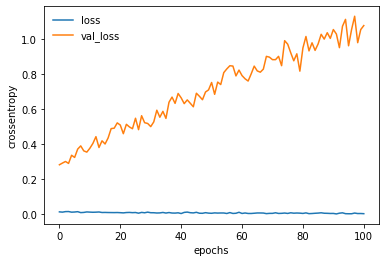

In [87]:
# グラフで学習過程を確認
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) 
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

# かなり早い段階で過学習を引き起こしていることがわかった（学習データに対しては適合しているが、検証データに対しては全く適合していない）

In [88]:
# テストデータによる評価

# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [89]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [90]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [91]:
# この結果は意外だった。というのは、上の図からかなり過学習を起こしていたため、テストデータに対しても適応できないと思ったからだ。
# とりあえずacccuracyが0.97であることからまずまずの結果だとは思うが、このモデルではデータの位置関係などを無視してしまっているため、まだ改善の余地がありそう
# 次は入力層をCNNにしたモデルで分類をしてみる

# (28,28)の画像の形状にreshape
X2_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [92]:
# 形状を確認
print(X2_train.shape)

(42000, 28, 28, 1)


In [93]:
# データの分割
X_train, X_valid, Y_train, Y_valid = train_test_split(X2_train, Y_train, test_size=0.3, random_state=0)

In [94]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (29400, 10) , X_train= (29400, 28, 28, 1)
Y_valid= (12600, 10) , X_valid= (12600, 28, 28, 1)
Y_test= (10000, 10) , X_test= (10000, 28, 28, 1)


In [95]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [96]:
model = keras.Sequential()

# 入力層
model.add(Conv2D(32, kernel_size=3, padding="same", strides=1,
    input_shape=(28, 28, 1,), activation="relu"))
model.add(Flatten())
# 中間層
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
# モデルの構造を表示
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 16)                401424    
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                170       
Total params: 402,458
Trainable params: 402,458
Non-trainable params: 0
________________________________________________

In [98]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
919/919 [==============================] - 5s 5ms/step - loss: 0.7154 - accuracy: 0.7744 - val_loss: 0.2957 - val_accuracy: 0.9153
Epoch 2/5000
919/919 [==============================] - 4s 5ms/step - loss: 0.2084 - accuracy: 0.9397 - val_loss: 0.1575 - val_accuracy: 0.9526
Epoch 3/5000
919/919 [==============================] - 5s 5ms/step - loss: 0.1191 - accuracy: 0.9664 - val_loss: 0.1186 - val_accuracy: 0.9667
Epoch 4/5000
919/919 [==============================] - 5s 5ms/step - loss: 0.0848 - accuracy: 0.9757 - val_loss: 0.1092 - val_accuracy: 0.9709
Epoch 5/5000
919/919 [==============================] - 5s 6ms/step - loss: 0.0660 - accuracy: 0.9814 - val_loss: 0.1151 - val_accuracy: 0.9687
Epoch 6/5000
919/919 [==============================] - 5s 5ms/step - loss: 0.0535 - accuracy: 0.9846 - val_loss: 0.0920 - val_accuracy: 0.9764
Epoch 7/5000
919/919 [==============================] - 5s 5ms/step - loss: 0.0442 - accuracy: 0.9879 - val_loss: 0.0913 - val_accuracy:

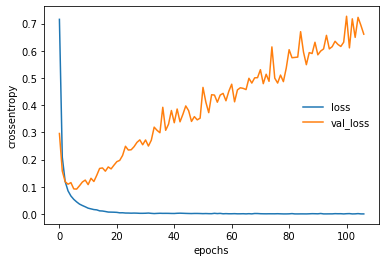

In [100]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) 
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [101]:
# テストデータによる評価

# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [102]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [103]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [105]:
# accuracyが変化しなかったが、crossentropy軸の値とepochs=0付近をみる限り、先ほどよりも若干過学習を抑えることが出来、データの位置関係にロバストであることが実感できた。
# また、過学習は、学習データについて詳細すぎるデータを与えてしまっていることが原因と考えられる。
# そのため、次の手法を導入する。
# 過学習を抑制するために、dropout層（与えるデータ情報を大雑把にするため）と、(max)pooling層（データ圧縮するため）を導入する。
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [107]:
model = keras.Sequential()

# 入力層
model.add(Conv2D(32, kernel_size=3, padding="same", strides=1,
    input_shape=(28, 28, 1,), activation="relu"))
# プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウト層
model.add(Dropout(0.25))

model.add(Flatten())

# 中間層
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
# モデルの構造を表示
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 16)                100368    
_________________________________________________________________
dense_40 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_41 (Dense)             (None, 16)              

In [109]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
919/919 [==============================] - 6s 6ms/step - loss: 0.6416 - accuracy: 0.7934 - val_loss: 0.2481 - val_accuracy: 0.9274
Epoch 2/5000
919/919 [==============================] - 5s 6ms/step - loss: 0.2085 - accuracy: 0.9399 - val_loss: 0.1526 - val_accuracy: 0.9569
Epoch 3/5000
919/919 [==============================] - 5s 6ms/step - loss: 0.1400 - accuracy: 0.9578 - val_loss: 0.1154 - val_accuracy: 0.9667
Epoch 4/5000
919/919 [==============================] - 6s 6ms/step - loss: 0.1150 - accuracy: 0.9664 - val_loss: 0.1185 - val_accuracy: 0.9650
Epoch 5/5000
919/919 [==============================] - 6s 6ms/step - loss: 0.0964 - accuracy: 0.9711 - val_loss: 0.0968 - val_accuracy: 0.9727
Epoch 6/5000
919/919 [==============================] - 6s 6ms/step - loss: 0.0878 - accuracy: 0.9736 - val_loss: 0.0879 - val_accuracy: 0.9743
Epoch 7/5000
919/919 [==============================] - 6s 6ms/step - loss: 0.0783 - accuracy: 0.9761 - val_loss: 0.0853 - val_accuracy:

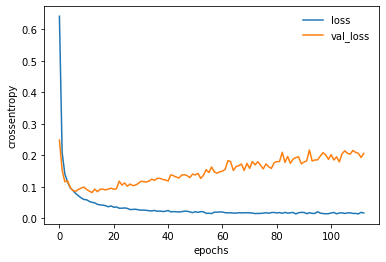

In [110]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) 
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [111]:
# テストデータによる評価

# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [112]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [113]:
# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# accuracyも0.98と増加したが、前までのモデルと比べて、過学習具合が小さくなった。

# 全体を通して
# 大規模データセットだと、情報をある程度落とさなければ容易に過学習をしてしまうということが実感できた。
# （初回提出時にはsklearnのdigit datasetを使用し、dropout,poolingを行わなくても極端に過学習をすることはありませんでした。）